### Initialisation un circuit quantique
- 1 registre de 2 qubits pour les calculs
- 1 registre de 2 bits classiques pour la mesure des résultats
- 1 circuit
- 1 mesure des 2 Qubits

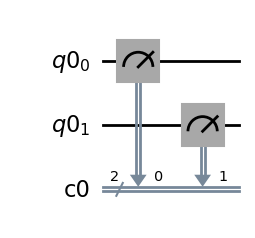

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qubits = QuantumRegister(2)
mesure = ClassicalRegister(2)
circuit = QuantumCircuit(qubits, mesure)

circuit.measure(qubits, mesure)

circuit.draw("mpl")

### Lançons une **simulation**

In [2]:
from qiskit_aer import Aer
from qiskit_ibm_runtime import SamplerV2
from qiskit import transpile
from qiskit.visualization import plot_histogram

simulateur = Aer.get_backend("qasm_simulator")

def launch(backend, circuit):
    sampler = SamplerV2(mode=backend)
    transpiled_circuit = transpile(circuit, backend)
    job = sampler.run([transpiled_circuit])
    job_results = job.result()[0].data.c0.get_counts()
    print(job_results)
    return job_results

{'00': 1024}


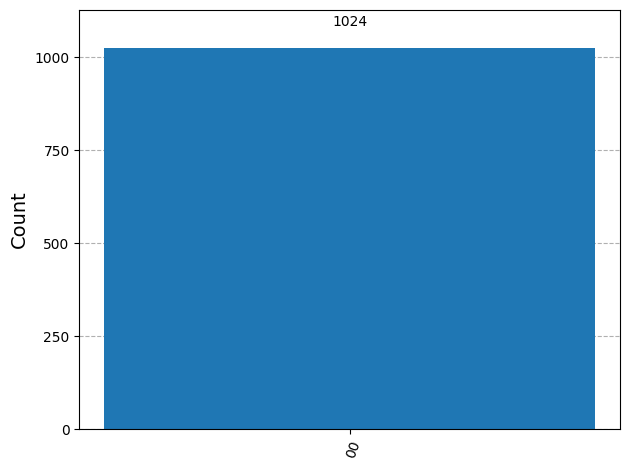

In [3]:
plot_histogram( launch(simulateur, circuit))

Le calcul est lancé 1024 fois, c'est la valeur par defaut sur le simulateur pour voir différents états de superposition.<br>
Ici le résultat est toujours 00, par défaut les Qubits on une probabilité de 100% d'être lus à 0

#### On améliore un peu le circuit et on relance
- 1 porte Hadamard pour mettre de la superposition
- 1 port Pauli X (Not)

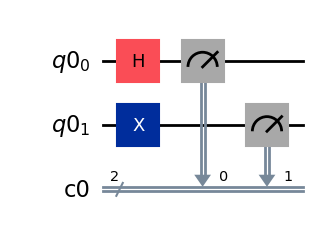

In [4]:
circuit.clear()
circuit.h(qubits[0])
circuit.x(qubits[1])
circuit.measure(qubits, mesure)
circuit.draw("mpl")

{'10': 535, '11': 489}


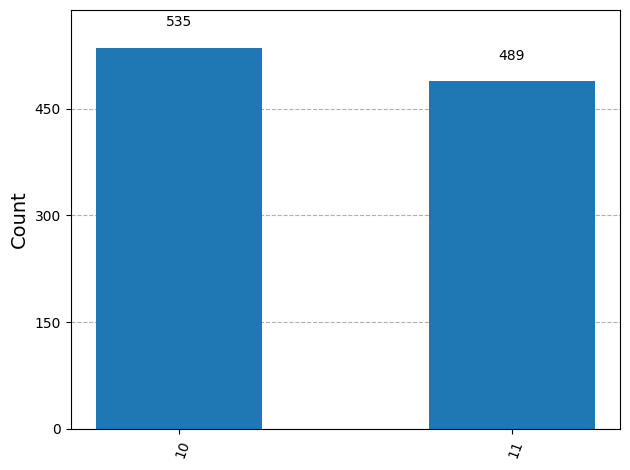

In [5]:
plot_histogram( launch(simulateur, circuit))

On retrouve bien la supperposition sur un des bits et le Not sur le second bit.<br>
Les valeurs possibles sont donc une superposition equiprobable entre 01 et 11 (l'ordre des bits est inversé dans le résultat).<br>
Si on exécute le calculs plusieurs fois la répartition change mais reste toujours dans l'ordre 50-50.

### Essayons maintenant sur un ***véritable ordinateur quantique***

In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService
import os

service = QiskitRuntimeService(channel='ibm_quantum', token=os.getenv('IBM_API_KEY'), verify=False)
qpu = service.least_busy(simulator=False, operational=True)

print("Calculateur sélectionne : {}({} Qubits)".format(qpu.name, qpu.num_qubits))

Calculateur sélectionne : ibm_sherbrooke(127 Qubits)


{'10': 2068, '11': 2001, '01': 13, '00': 14}


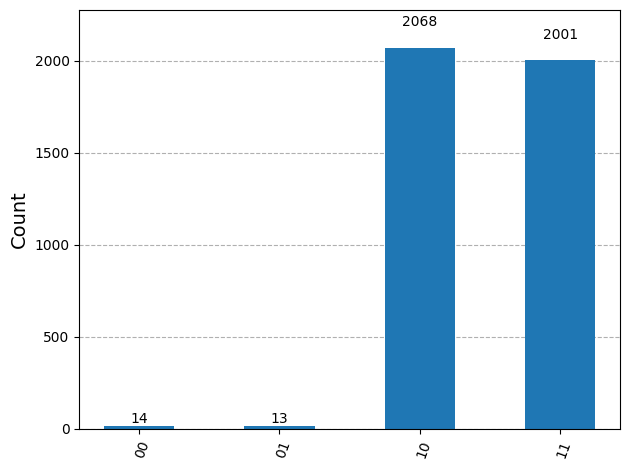

In [7]:
plot_histogram( launch(qpu, circuit))

Par defaut le calculateur effectue 4096 ittérations.<br>
On retrouve la répartition homogène des résultats sur les valeurs 01 et 11.<br>

On remarque aussi l'apparition de quelques résultats avec les valeurs 00 et 10 que l'algorithme ne permet pas, ce sont les erreurs résultantes de "l'imperfection" des qubits.